In [35]:
# https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5
# https://colab.research.google.com/drive/1l4bbQkcjn7Oy-SMnaLnlobQ4sorgHB2S?usp=sharing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader.data as web
%matplotlib inline
coin = ' Cash'
#goal = "BCH-USD"
#data = web.DataReader(goal, 'yahoo')

data = pd.read_csv("data/"+coin+".csv")

In [36]:
data.reset_index(level=0, inplace=True)
data.tail()

,index,Date,Open*,High,Low,Close**,Volume,Market Cap
175,175,"Sep 06, 2020",$225.30,$232.96,$220.78,$228.45,"$2,533,324,540","$4,228,811,552"
176,176,"Sep 05, 2020",$231.64,$234.97,$216.58,$225.30,"$3,128,814,772","$4,170,251,808"
177,177,"Sep 04, 2020",$215.62,$239.19,$215.02,$231.87,"$2,130,928,347","$4,291,714,837"
178,178,"Sep 03, 2020",$264.09,$265.94,$214.00,$216.06,"$1,891,347,861","$3,998,851,865"
179,179,"Sep 02, 2020",$292.43,$294.54,$258.74,$264.12,"$2,049,397,876","$4,888,043,310"


In [37]:
# Select only the important features i.e. the date and price
data = data[["Date","Close**"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close**":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,"Feb 28, 2021",$459.91
1,"Feb 27, 2021",$483.75
2,"Feb 26, 2021",$484.51
3,"Feb 25, 2021",$496.91
4,"Feb 24, 2021",$527.04


In [38]:
'''
def stringToFloat(value):
    valueDot = str(value).replace(',', '.')
    valueDot = valueDot.split('.')
    
    #print(valueDot)
    valueFinal = ""
    for index in range(0, len(valueDot)-1):
        valueFinal += str(valueDot[index])
    valueFinal += "." + str(valueDot[-1])
    #print(valueFinal)
    return float(valueFinal)

data['y'] = data['y'].apply(stringToFloat)
'''

def removeSymbol(value):
    valueDot = str(value).replace('$', '')
    return float(valueDot)

data['y'] = data['y'].apply(removeSymbol)

In [39]:
data.head(5)

,ds,y
0,"Feb 28, 2021",459.91
1,"Feb 27, 2021",483.75
2,"Feb 26, 2021",484.51
3,"Feb 25, 2021",496.91
4,"Feb 24, 2021",527.04


In [40]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


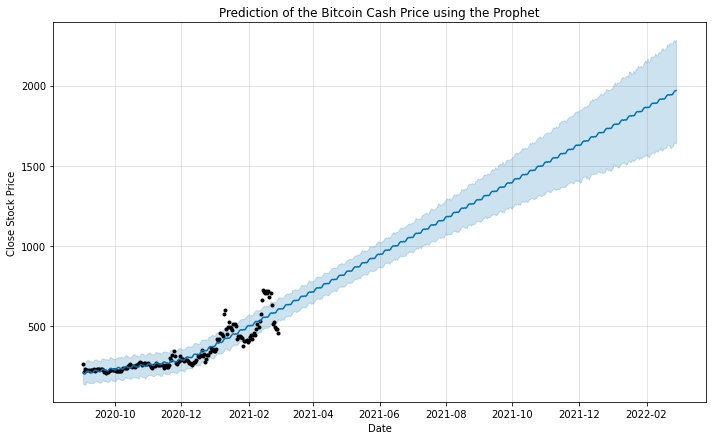

In [41]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the " + coin + " Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

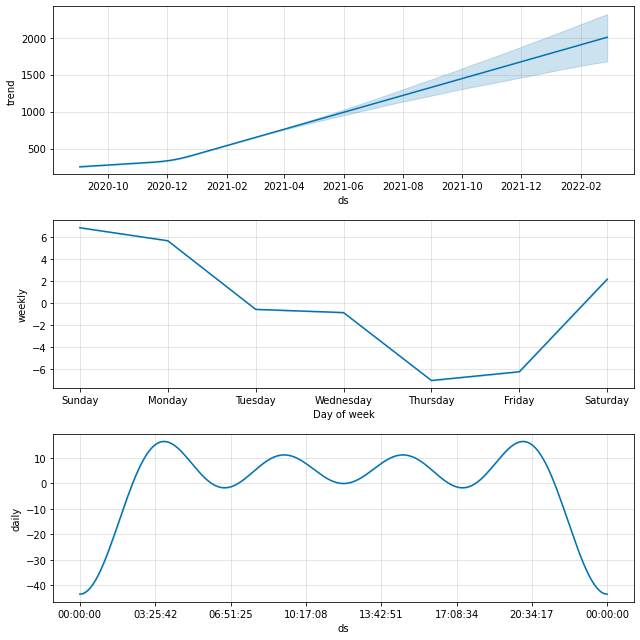

In [42]:
# Plot the trend, weekly, seasonally, yearly and daily components
m.plot_components(prediction)
plt.show()

In [43]:
future_prediction = prediction[-365:]
future_prediction= future_prediction[['ds', 'yhat']]
future_prediction.head(10)

,ds,yhat
180,2021-03-01,608.592040
181,2021-03-02,606.118142
182,2021-03-03,609.562939
183,2021-03-04,607.155348
184,2021-03-05,611.684311
185,2021-03-06,623.798849
186,2021-03-07,632.193408
187,2021-03-08,634.756060
188,2021-03-09,632.282162
189,2021-03-10,635.726959


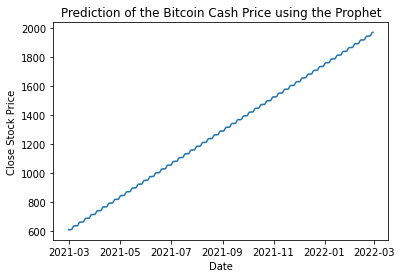

In [44]:
plt.plot(future_prediction.ds.values, future_prediction.yhat.values)
plt.title("Prediction of the " + coin + " Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [91]:
future_prediction[future_prediction['ds'] == '2021-01-01']

,ds,yhat
1258,2021-01-01,616.317603


In [94]:
future_prediction[future_prediction['ds'] > '2020-12-20']['yhat'].head(20)

1247    492.141362
1248    512.199793
1249    538.270580
1250    547.112315
1251    569.015956
1252    589.584702
1253    602.095777
1254    609.382587
1255    613.441962
1256    622.353174
1257    613.127435
1258    616.317603
1259    617.793256
1260    611.097770
1261    599.325907
1262    584.726768
1263    575.618821
1264    549.235813
1265    536.333312
1266    522.961117
Name: yhat, dtype: float64

In [95]:
future

,ds
0,2017-07-23
1,2017-07-24
2,2017-07-25
3,2017-07-26
4,2017-07-27
...,...
1532,2021-10-02
1533,2021-10-03
1534,2021-10-04
1535,2021-10-05
